## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  99.771550   593.291823  0.690329  7.867807  1.467310
1  28.094870  1693.997384  0.420730  6.264474  1.475666
2  68.944503   701.548623  0.196561  1.702812  1.000042
3  71.397425   509.783140  0.593214  7.835644  1.405598
4  10.029376  1381.734717  0.474707  4.775098  1.473499


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9759854	total: 55.2ms	remaining: 55.1s
1:	learn: 0.9689153	total: 55.6ms	remaining: 27.8s
2:	learn: 0.9574931	total: 56.1ms	remaining: 18.7s
3:	learn: 0.9465824	total: 56.7ms	remaining: 14.1s
4:	learn: 0.9372740	total: 57.3ms	remaining: 11.4s
5:	learn: 0.9297264	total: 57.7ms	remaining: 9.56s
6:	learn: 0.9204601	total: 58.1ms	remaining: 8.24s
7:	learn: 0.9087769	total: 58.5ms	remaining: 7.25s
8:	learn: 0.9000655	total: 58.8ms	remaining: 6.47s
9:	learn: 0.8897938	total: 59.1ms	remaining: 5.85s
10:	learn: 0.8798814	total: 59.5ms	remaining: 5.35s
11:	learn: 0.8694215	total: 59.9ms	remaining: 4.93s
12:	learn: 0.8609126	total: 60.3ms	remaining: 4.58s
13:	learn: 0.8536129	total: 60.7ms	remaining: 4.27s
14:	learn: 0.8429836	total: 61ms	remaining: 4.01s
15:	learn: 0.8345581	total: 61.4ms	remaining: 3.78s
16:	learn: 0.8254673	total: 62ms	remaining: 3.58s
17:	learn: 0.8158241	total: 62.4ms	remaining: 3.4s
18:	learn: 0.8079701	total: 62.7ms	remaining: 3.2

124:	learn: 0.3188421	total: 105ms	remaining: 738ms
125:	learn: 0.3163716	total: 106ms	remaining: 734ms
126:	learn: 0.3139927	total: 106ms	remaining: 731ms
127:	learn: 0.3118148	total: 107ms	remaining: 728ms
128:	learn: 0.3092976	total: 107ms	remaining: 725ms
129:	learn: 0.3069576	total: 108ms	remaining: 720ms
130:	learn: 0.3050801	total: 108ms	remaining: 717ms
131:	learn: 0.3030228	total: 109ms	remaining: 714ms
132:	learn: 0.3013882	total: 109ms	remaining: 710ms
133:	learn: 0.2989565	total: 109ms	remaining: 707ms
134:	learn: 0.2974040	total: 110ms	remaining: 704ms
135:	learn: 0.2957516	total: 110ms	remaining: 701ms
136:	learn: 0.2936572	total: 111ms	remaining: 698ms
137:	learn: 0.2914476	total: 111ms	remaining: 694ms
138:	learn: 0.2896239	total: 112ms	remaining: 691ms
139:	learn: 0.2879387	total: 112ms	remaining: 688ms
140:	learn: 0.2859346	total: 112ms	remaining: 684ms
141:	learn: 0.2841748	total: 113ms	remaining: 681ms
142:	learn: 0.2822800	total: 113ms	remaining: 678ms
143:	learn: 

300:	learn: 0.1327274	total: 186ms	remaining: 432ms
301:	learn: 0.1321662	total: 186ms	remaining: 431ms
302:	learn: 0.1312457	total: 187ms	remaining: 430ms
303:	learn: 0.1306929	total: 187ms	remaining: 428ms
304:	learn: 0.1301642	total: 188ms	remaining: 428ms
305:	learn: 0.1294566	total: 188ms	remaining: 427ms
306:	learn: 0.1290237	total: 189ms	remaining: 426ms
307:	learn: 0.1285008	total: 189ms	remaining: 425ms
308:	learn: 0.1278745	total: 190ms	remaining: 424ms
309:	learn: 0.1272670	total: 190ms	remaining: 423ms
310:	learn: 0.1266040	total: 191ms	remaining: 422ms
311:	learn: 0.1263695	total: 191ms	remaining: 421ms
312:	learn: 0.1258655	total: 191ms	remaining: 420ms
313:	learn: 0.1252961	total: 192ms	remaining: 419ms
314:	learn: 0.1247992	total: 192ms	remaining: 418ms
315:	learn: 0.1242648	total: 193ms	remaining: 418ms
316:	learn: 0.1236683	total: 193ms	remaining: 417ms
317:	learn: 0.1230731	total: 194ms	remaining: 416ms
318:	learn: 0.1225839	total: 195ms	remaining: 415ms
319:	learn: 

512:	learn: 0.0673072	total: 288ms	remaining: 274ms
513:	learn: 0.0669532	total: 289ms	remaining: 273ms
514:	learn: 0.0668359	total: 289ms	remaining: 273ms
515:	learn: 0.0667205	total: 290ms	remaining: 272ms
516:	learn: 0.0663732	total: 291ms	remaining: 271ms
517:	learn: 0.0661639	total: 291ms	remaining: 271ms
518:	learn: 0.0660509	total: 292ms	remaining: 270ms
519:	learn: 0.0658499	total: 292ms	remaining: 269ms
520:	learn: 0.0655108	total: 292ms	remaining: 269ms
521:	learn: 0.0653444	total: 293ms	remaining: 268ms
522:	learn: 0.0652344	total: 293ms	remaining: 267ms
523:	learn: 0.0649027	total: 293ms	remaining: 267ms
524:	learn: 0.0646959	total: 294ms	remaining: 266ms
525:	learn: 0.0645553	total: 294ms	remaining: 265ms
526:	learn: 0.0642315	total: 295ms	remaining: 265ms
527:	learn: 0.0641248	total: 295ms	remaining: 264ms
528:	learn: 0.0640199	total: 296ms	remaining: 264ms
529:	learn: 0.0637022	total: 297ms	remaining: 263ms
530:	learn: 0.0636481	total: 297ms	remaining: 262ms
531:	learn: 

689:	learn: 0.0439415	total: 369ms	remaining: 166ms
690:	learn: 0.0437854	total: 370ms	remaining: 165ms
691:	learn: 0.0436195	total: 370ms	remaining: 165ms
692:	learn: 0.0434594	total: 371ms	remaining: 164ms
693:	learn: 0.0432359	total: 371ms	remaining: 164ms
694:	learn: 0.0430931	total: 372ms	remaining: 163ms
695:	learn: 0.0430782	total: 372ms	remaining: 163ms
696:	learn: 0.0428616	total: 372ms	remaining: 162ms
697:	learn: 0.0426682	total: 373ms	remaining: 161ms
698:	learn: 0.0424761	total: 373ms	remaining: 161ms
699:	learn: 0.0423808	total: 374ms	remaining: 160ms
700:	learn: 0.0422135	total: 374ms	remaining: 159ms
701:	learn: 0.0421190	total: 374ms	remaining: 159ms
702:	learn: 0.0419555	total: 375ms	remaining: 158ms
703:	learn: 0.0418850	total: 375ms	remaining: 158ms
704:	learn: 0.0417004	total: 375ms	remaining: 157ms
705:	learn: 0.0416170	total: 376ms	remaining: 157ms
706:	learn: 0.0413759	total: 376ms	remaining: 156ms
707:	learn: 0.0411895	total: 377ms	remaining: 155ms
708:	learn: 

909:	learn: 0.0229047	total: 470ms	remaining: 46.5ms
910:	learn: 0.0228364	total: 471ms	remaining: 46ms
911:	learn: 0.0228217	total: 471ms	remaining: 45.5ms
912:	learn: 0.0227723	total: 472ms	remaining: 44.9ms
913:	learn: 0.0227346	total: 472ms	remaining: 44.4ms
914:	learn: 0.0227229	total: 472ms	remaining: 43.9ms
915:	learn: 0.0226493	total: 473ms	remaining: 43.4ms
916:	learn: 0.0225858	total: 473ms	remaining: 42.8ms
917:	learn: 0.0225194	total: 474ms	remaining: 42.3ms
918:	learn: 0.0225078	total: 474ms	remaining: 41.8ms
919:	learn: 0.0224456	total: 474ms	remaining: 41.3ms
920:	learn: 0.0223639	total: 475ms	remaining: 40.7ms
921:	learn: 0.0222994	total: 475ms	remaining: 40.2ms
922:	learn: 0.0222878	total: 476ms	remaining: 39.7ms
923:	learn: 0.0222142	total: 476ms	remaining: 39.2ms
924:	learn: 0.0221354	total: 477ms	remaining: 38.7ms
925:	learn: 0.0220730	total: 477ms	remaining: 38.1ms
926:	learn: 0.0219962	total: 477ms	remaining: 37.6ms
927:	learn: 0.0218988	total: 478ms	remaining: 37

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

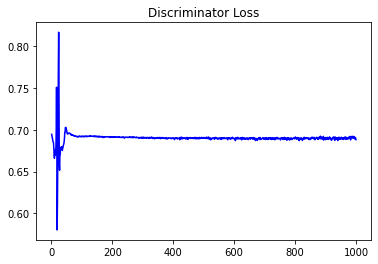

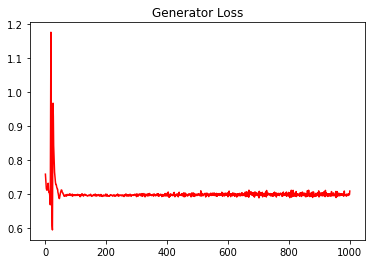

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2587360911697416


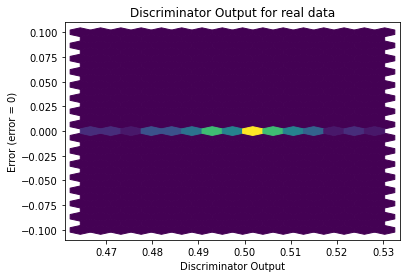

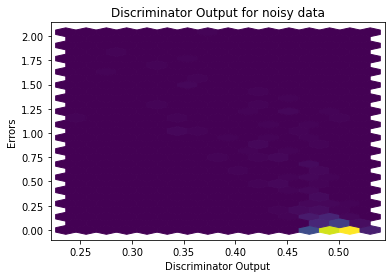

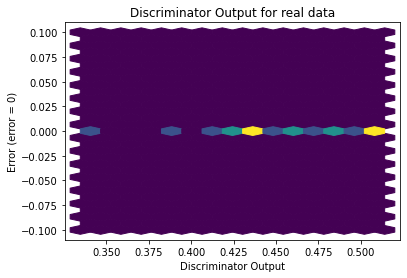

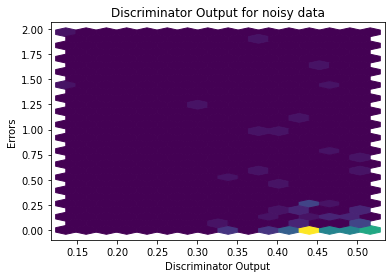

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


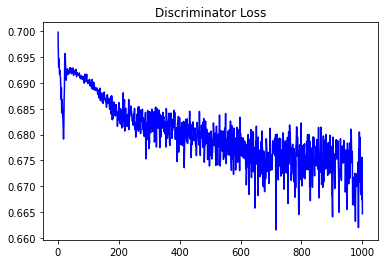

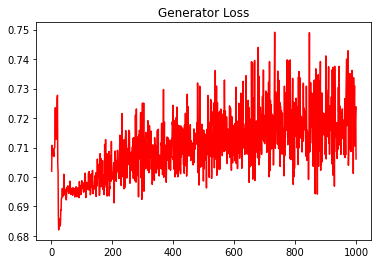

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.23788642721676947


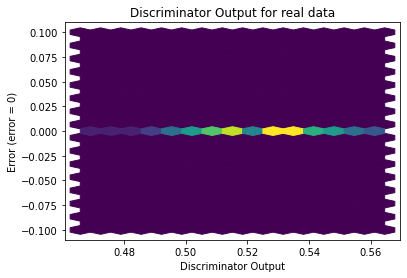

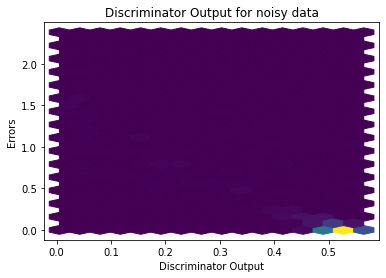

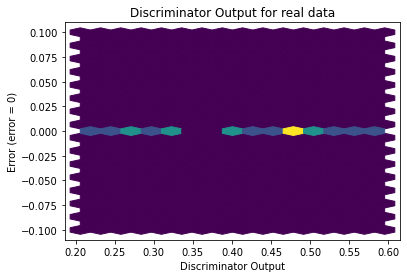

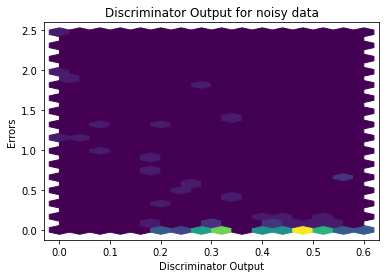

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1479]], requires_grad=True)
